In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
#show all columns
pd.set_option('display.max_columns', None)

In [3]:
filepath='/Users/rianrachmanto/pypro/data/loan_final313.csv'
#display all columns
pd.set_option('display.max_columns', None)

def loaddata(pathfile):
    df=pd.read_csv(pathfile)
    print(df.head())
    print(df.columns)
    #drop id
    df=df.drop(['id'],axis=1)
    #reset index
    df=df.reset_index(drop=True)

    #convert issue_d to datetime
    df['issue_d']=pd.to_datetime(df['issue_d'])

    #convert final_d to datetime
    df['final_d'] = pd.to_datetime(df['final_d'], format='%m%d%Y')

    
   
    
    #set x and y
    X=df.drop(['loan_condition_cat'],axis=1)
    y=df['loan_condition_cat']
    #split data
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    return X_train,X_test,y_train,y_test

In [4]:
X_train, X_test, y_train, y_test=loaddata(filepath)

        id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01/12/2011  1012015            10.0           RENT   
1  1077430  2011  01/12/2011  1042013             0.5           RENT   
2  1077175  2011  01/12/2011  1062014            10.0           RENT   
3  1076863  2011  01/12/2011  1012015            10.0           RENT   
4  1075358  2011  01/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   
1                   1             Low       30000           1         2500   
2                   1             Low       12252           1         2400   
3                   1             Low       49200           1        10000   
4                   1             Low       80000           1         3000   

         term  term_cat application_type  application_type_cat  \
0   36 months         1       IN

In [5]:
#import randomforest isolator
from sklearn.ensemble import IsolationForest
def eda(X_train, y_train, X_test, y_test):
    #print shape of X_train and X_test
    print('X_train shape: ',X_train.shape)
    print('X_test shape: ',X_test.shape)

    #print information of X_train
    print('X_train data types: ',X_train.info())

    #print describe of X_train in table
    print('X_train describe: ',X_train.describe())

    
    #print skewness of X_train
    print('X_train skewness: ',X_train.skew())
    
    #check missing value
    print('X_train missing value: ',X_train.isnull().sum())
    print('X_test missing value: ',X_test.isnull().sum())

    #check duplicate value
    print('X_train duplicate value: ',X_train.duplicated().sum())
    print('X_test duplicate value: ',X_test.duplicated().sum())

    #group all numerical variables
    num=X_train.select_dtypes(include=['int64','float64'])
    print('Numerical variables: ',num.columns)

    #group all categorical variables
    cat=X_train.select_dtypes(include=['object'])
    print('Categorical variables: ',cat.columns)

    #boxplot numerical variables with figure size 20,10
    plt.figure(figsize=(25,20))
    sns.boxplot(data=num)

   #remove outliers using IsolationForest
    iso=IsolationForest(contamination=0.1)
    yhat=iso.fit_predict(num)
    mask=yhat!=1
    X_train=X_train[mask]
    y_train=y_train[mask]
    
    
    #check shape of X_train and y_train
    print('X_train shape after removing outliers: ',X_train.shape)
    print('y_train shape after removing outliers: ',y_train.shape)

    
    #plot pie chart for loan_condition
    plt.figure(figsize=(10,10))
    plt.pie(y_train.value_counts(),labels=['Good Loan','Bad Loan'],autopct='%1.1f%%',shadow=True)

    #plot bar chart for loan_condition
    plt.figure(figsize=(10,10))
    sns.countplot(data=X_train, x='loan_condition')

    #plot histogram for X_train
    X_train.hist(figsize=(20,20))


    #filter with loan_condition is bad loan
    bad_loan=X_train[X_train['loan_condition']=='Bad Loan']

    #create function of countplot for bad_loan
    def countplot_bad_loan(col):
        plt.figure(figsize=(20,10))
        sns.countplot(data=bad_loan,x=col, order=bad_loan[col].value_counts().index)

    #plot countplot for home_ownership using function
    countplot_bad_loan('home_ownership')

    #plot countplot for income_category using function
    countplot_bad_loan('income_category')

    #plot countplot for term using function
    countplot_bad_loan('term')

    #plot countplot for purpose using function
    countplot_bad_loan('purpose')

    #plot countplot for interest_payments using function
    countplot_bad_loan('interest_payments')

    #plot countplot for application_type using function
    countplot_bad_loan('application_type')

    #plot countplot for grade using function
    countplot_bad_loan('grade')

    #plot countplot for region using function
    countplot_bad_loan('region')

    
    plt.figure(figsize=(10,10))
    sns.countplot(data=X_train, x='application_type',hue='loan_condition')

    #plot histogram for bad_loan
    bad_loan.hist(figsize=(20,20))

    #plot pairplot for bad_loan with figure size 20,20
    plt.figure(figsize=(20,20))
    sns.pairplot(data=bad_loan)

    #plot correlation heatmap for X_train
    plt.figure(figsize=(20,20))
    sns.heatmap(X_train.corr(),annot=True)
    


    return X_train, y_train, X_test, y_test








X_train shape:  (709903, 28)
X_test shape:  (177476, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 709903 entries, 329489 to 121958
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   year                  709903 non-null  int64         
 1   issue_d               709903 non-null  datetime64[ns]
 2   final_d               709903 non-null  datetime64[ns]
 3   emp_length_int        709903 non-null  float64       
 4   home_ownership        709903 non-null  object        
 5   home_ownership_cat    709903 non-null  int64         
 6   income_category       709903 non-null  object        
 7   annual_inc            709903 non-null  int64         
 8   income_cat            709903 non-null  int64         
 9   loan_amount           709903 non-null  int64         
 10  term                  709903 non-null  object        
 11  term_cat              709903 non-null  int64         
 

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2052/2851579755.py:16: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('X_train skewness: ',X_train.skew())


X_train skewness:  year                     -1.686025
emp_length_int           -0.209713
home_ownership_cat       -0.196713
annual_inc               45.287886
income_cat                2.157534
loan_amount               0.680722
term_cat                  0.870766
application_type_cat     42.092346
purpose_cat              -0.513758
interest_payment_cat      0.098010
interest_rate             0.429411
grade_cat                 0.583228
dti                     457.066886
total_pymnt               1.786723
total_rec_prncp           1.932421
recoveries               17.913378
installment               0.936918
dtype: float64
X_train missing value:  year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
applicati

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


X_train shape after removing outliers:  (70991, 28)
y_train shape after removing outliers:  (70991,)


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2052/2851579755.py:108: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True)


(        year    issue_d    final_d  emp_length_int home_ownership  \
 765875  2015 2015-01-05 2016-10-01             5.0       MORTGAGE   
 132313  2013 2013-01-06 2014-11-01            10.0            OWN   
 527023  2015 2015-01-11 2016-10-01             1.0           RENT   
 850323  2015 2015-01-01 2016-10-01            10.0           RENT   
 38538   2008 2008-01-08 2009-01-10             0.5           RENT   
 ...      ...        ...        ...             ...            ...   
 214176  2012 2012-01-06 2016-10-01             3.0       MORTGAGE   
 321879  2014 2014-01-08 2016-10-01            10.0            OWN   
 64820   2013 2013-01-11 2015-01-10            10.0       MORTGAGE   
 41090   2009 2009-01-07 2011-10-05             2.0       MORTGAGE   
 191335  2012 2012-01-10 2013-10-07             2.0       MORTGAGE   
 
         home_ownership_cat income_category  annual_inc  income_cat  \
 765875                   3          Medium      112050           2   
 132313         

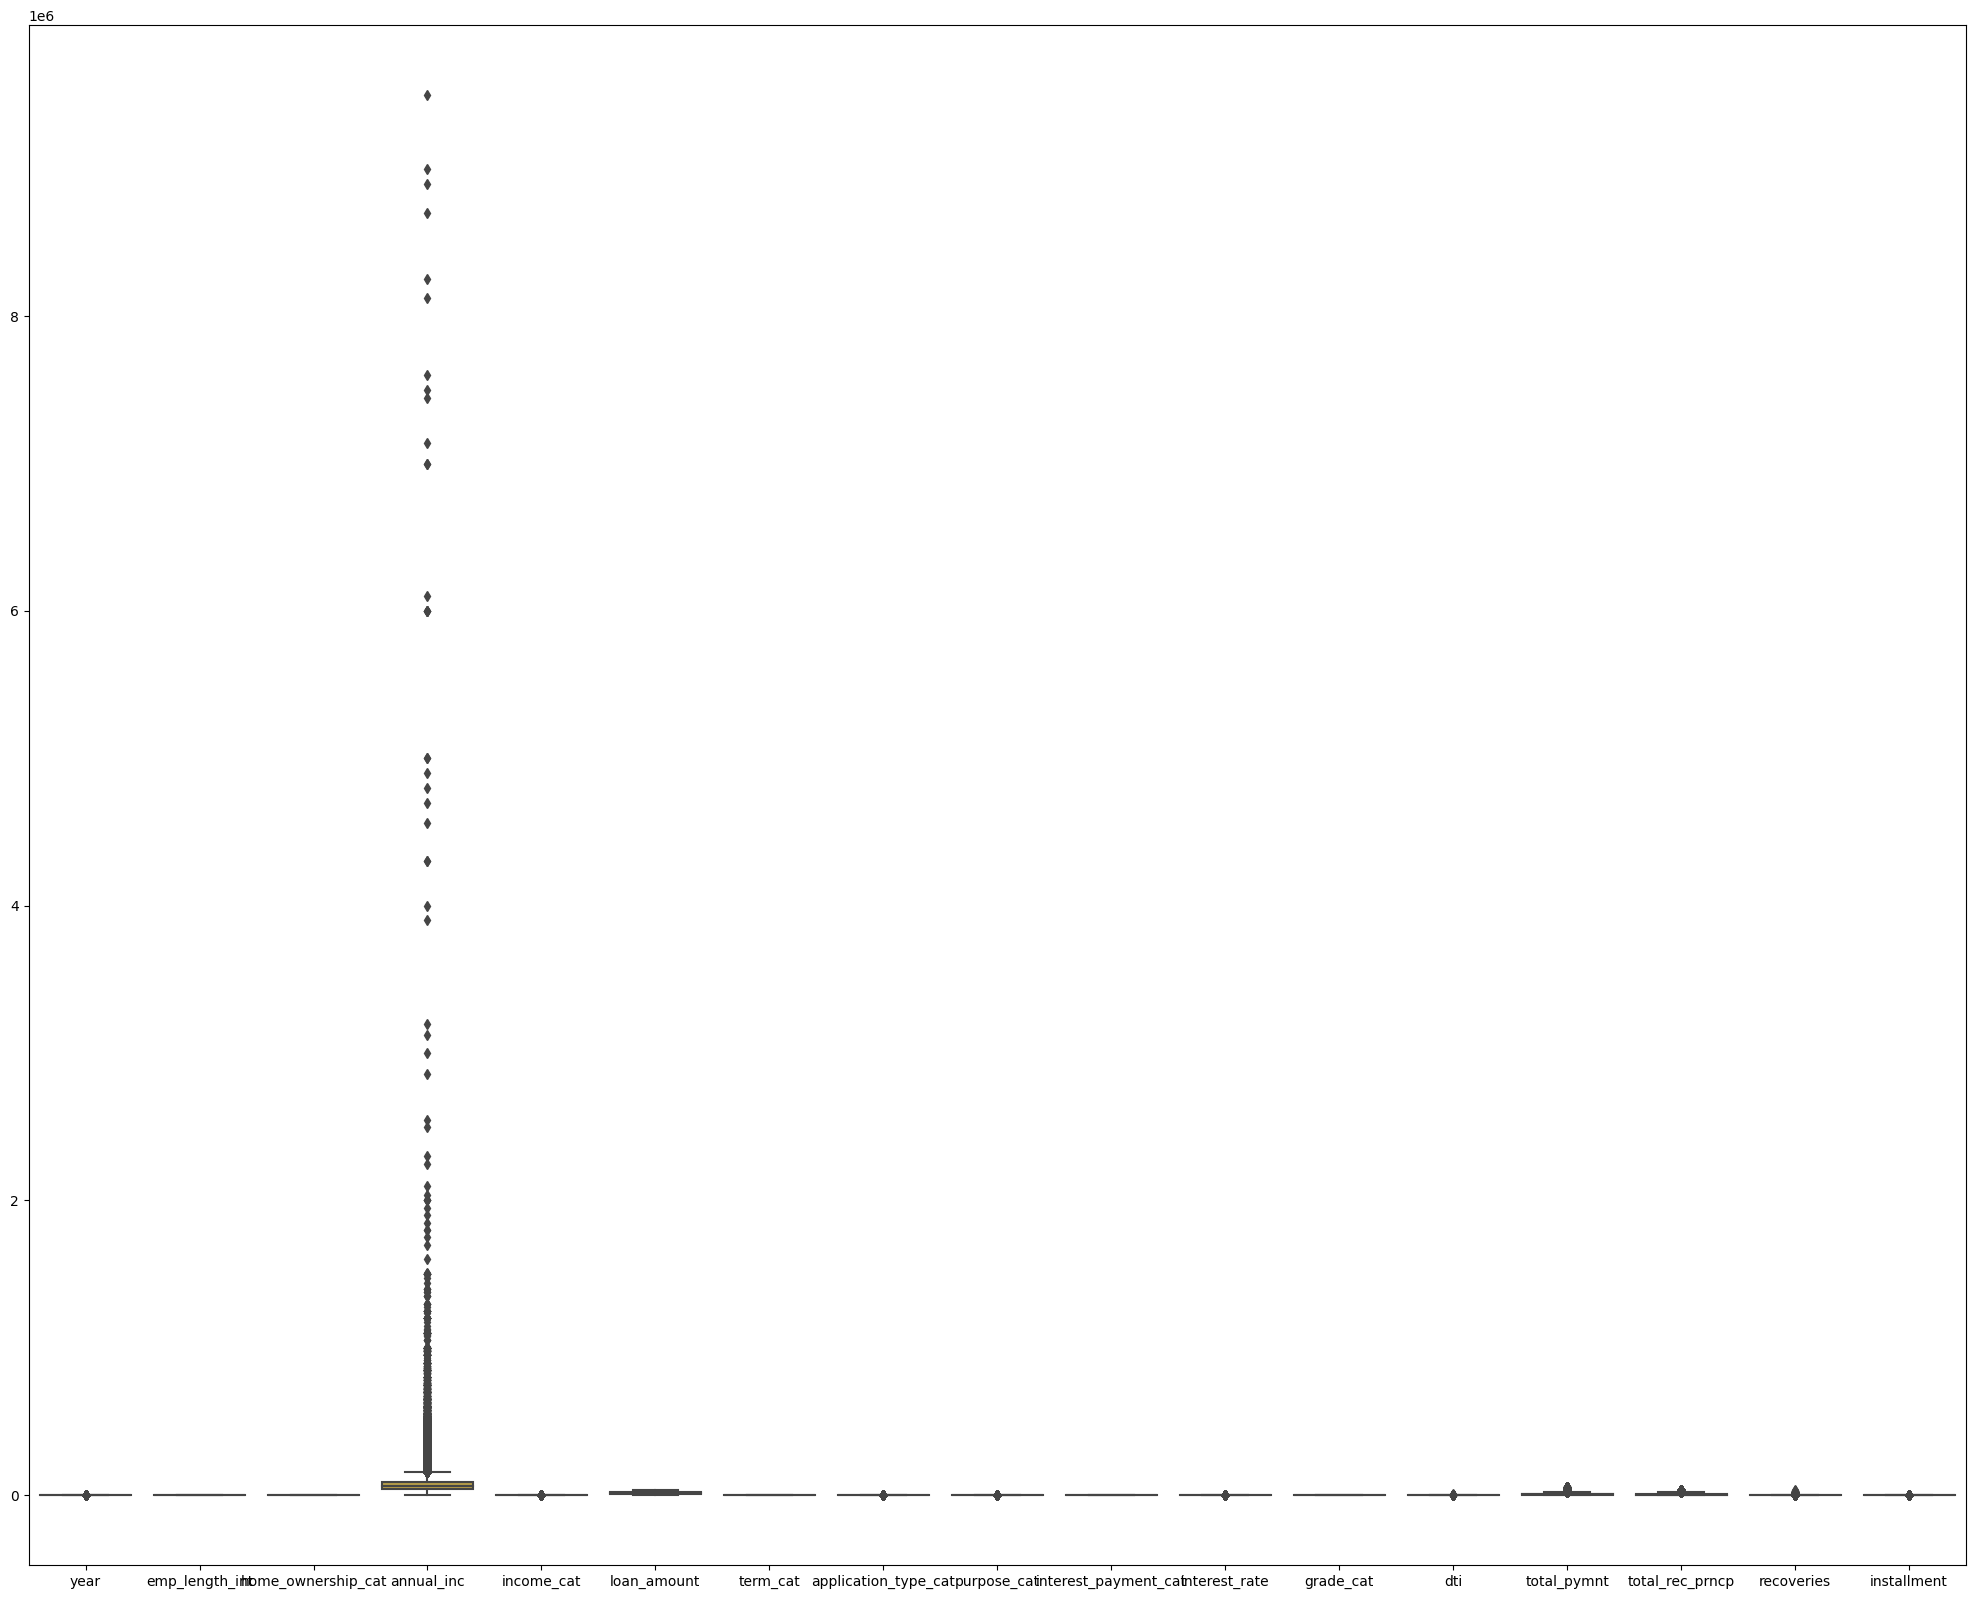

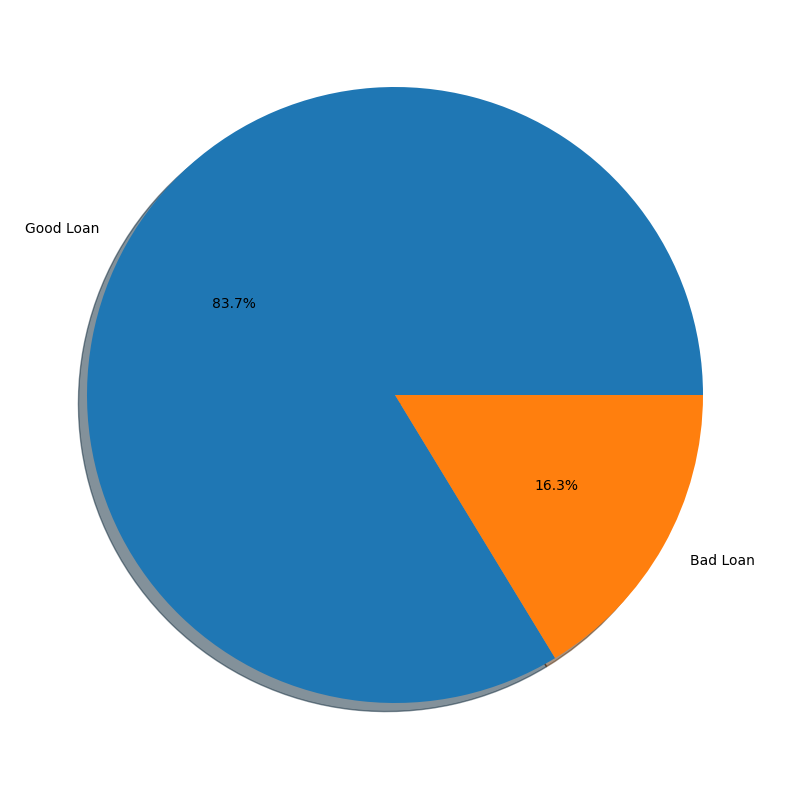

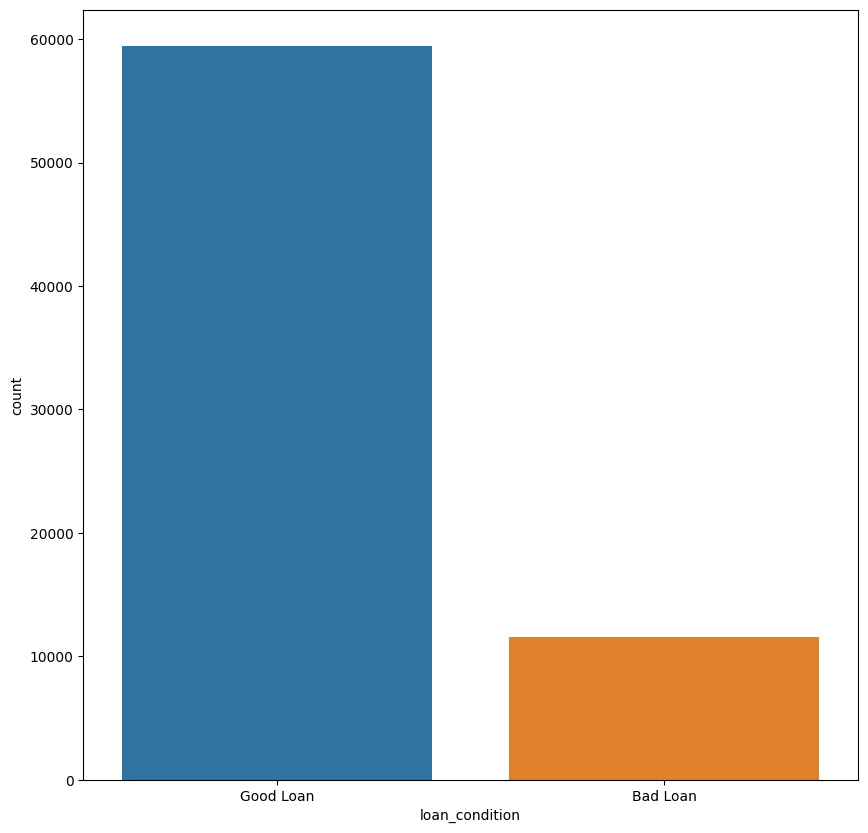

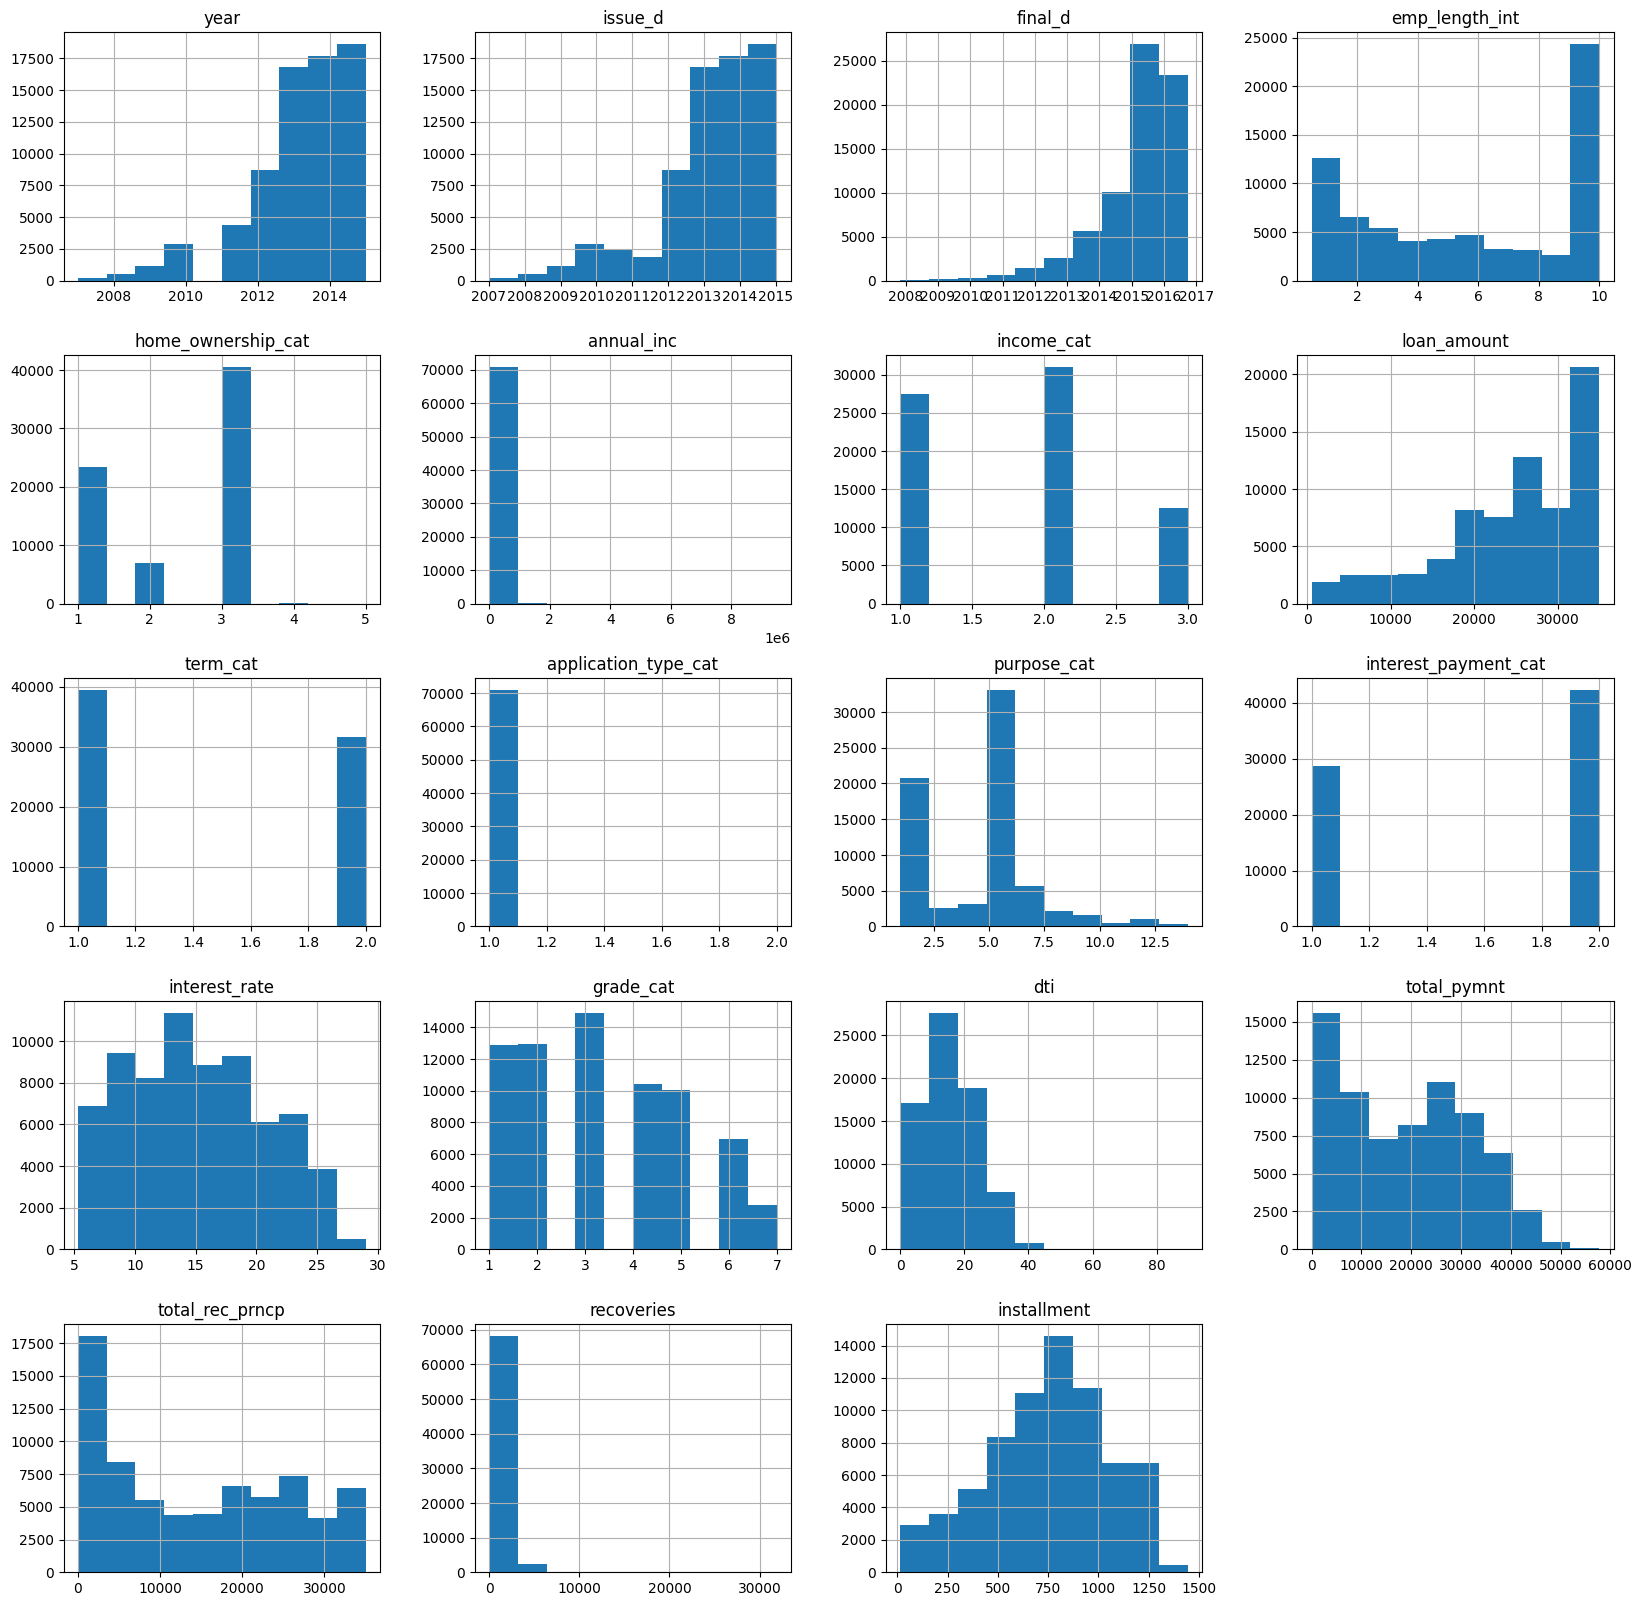

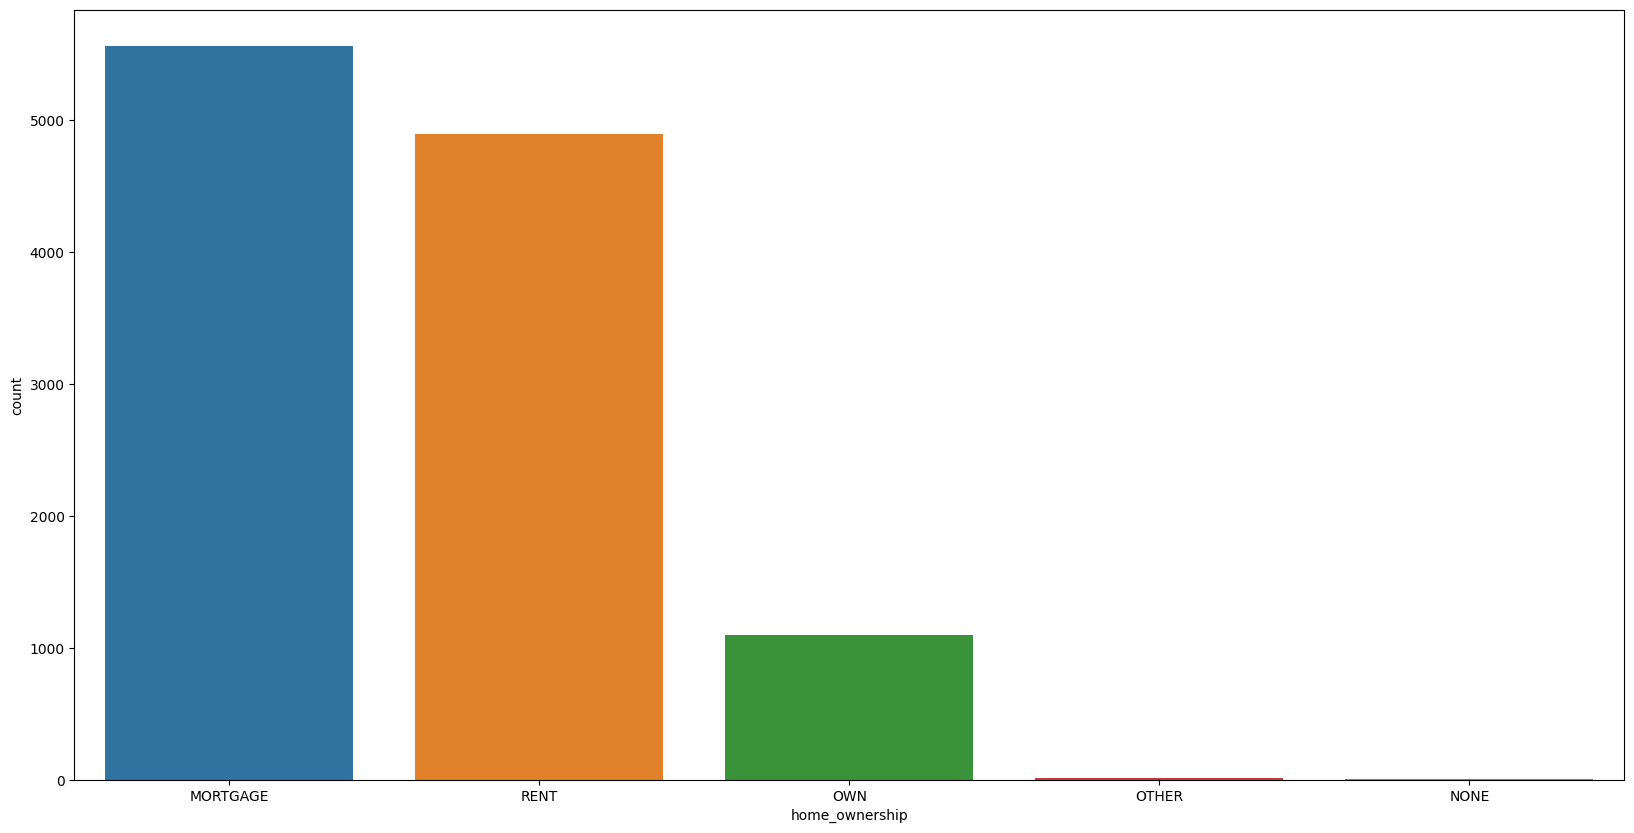

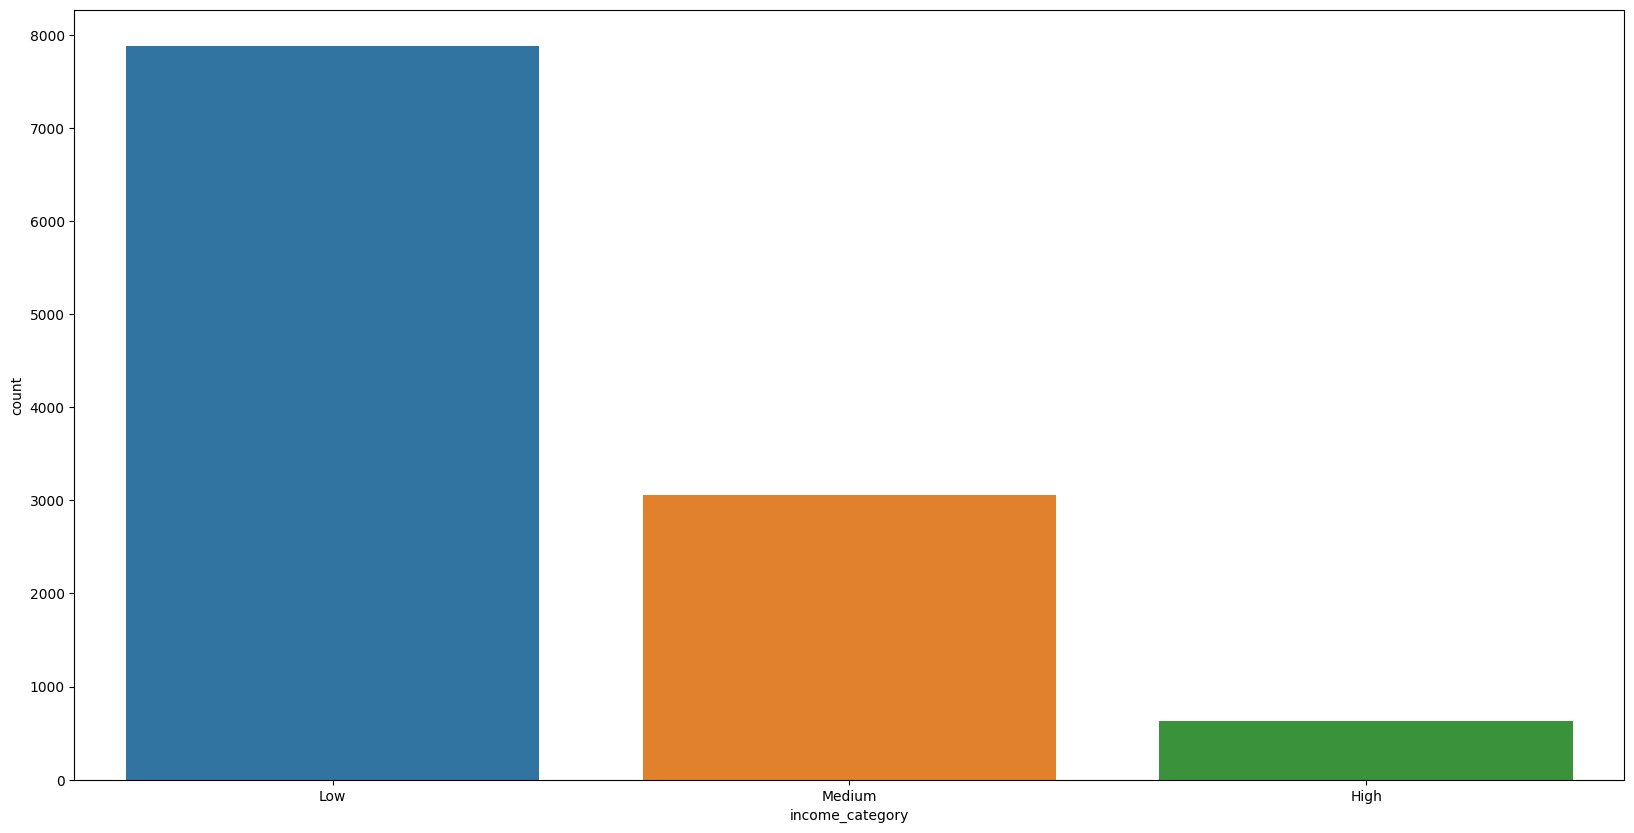

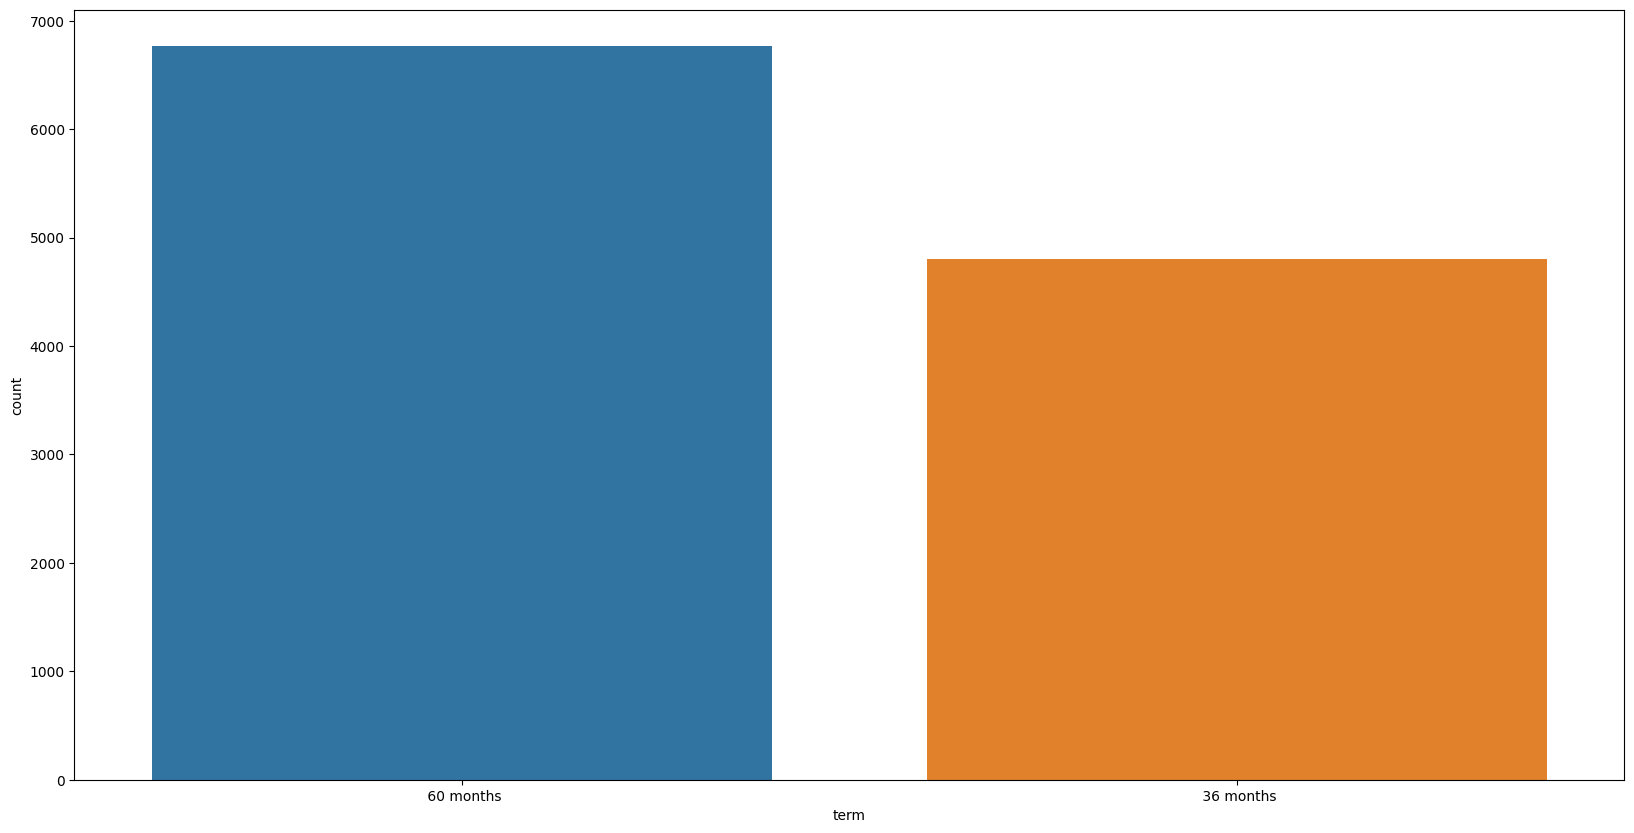

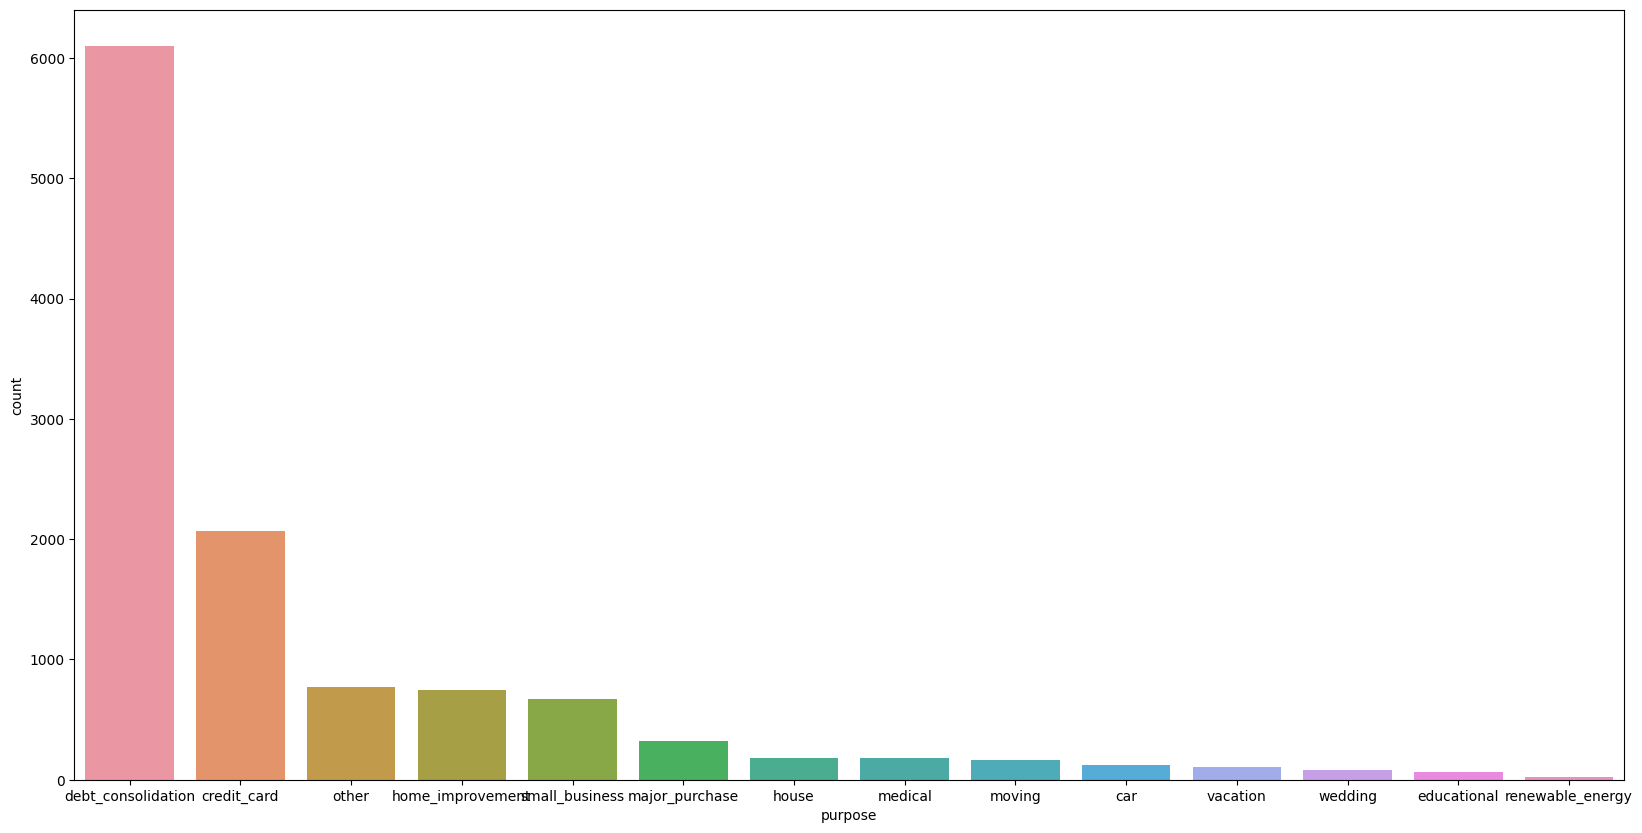

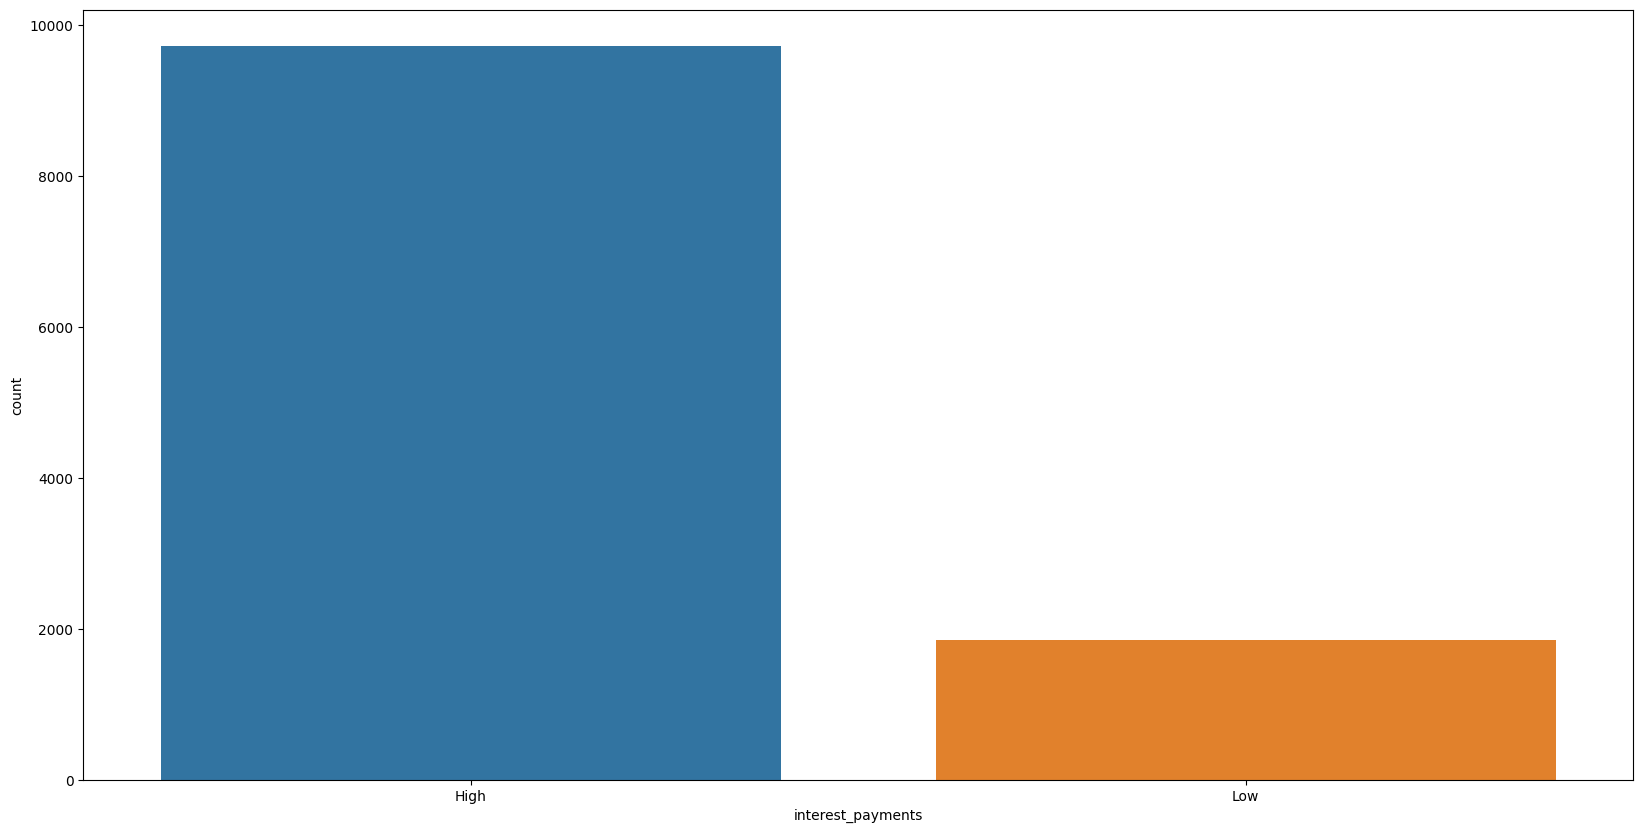

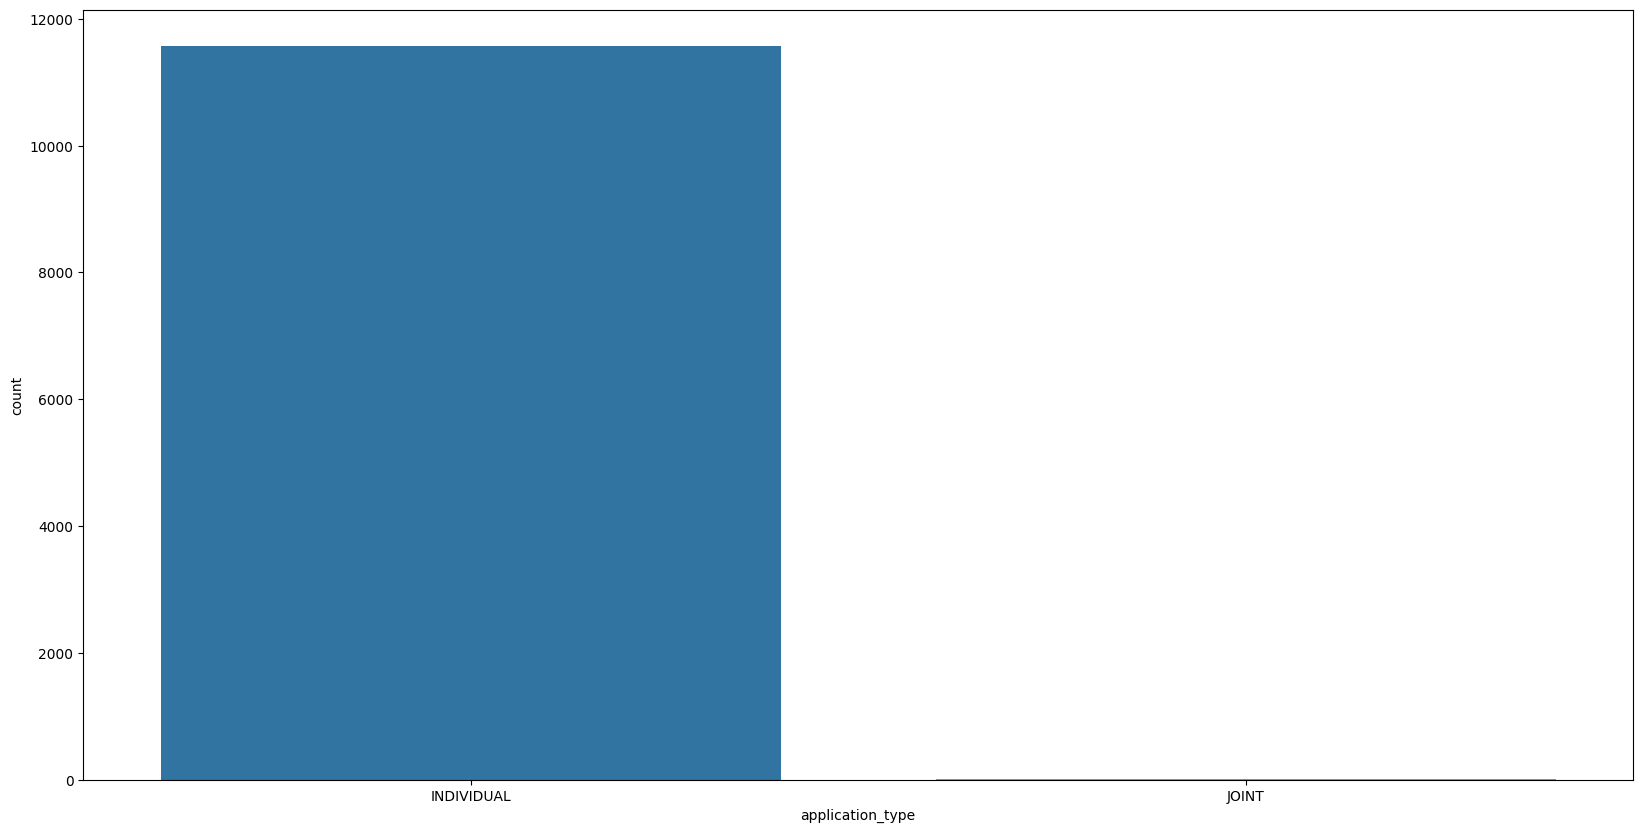

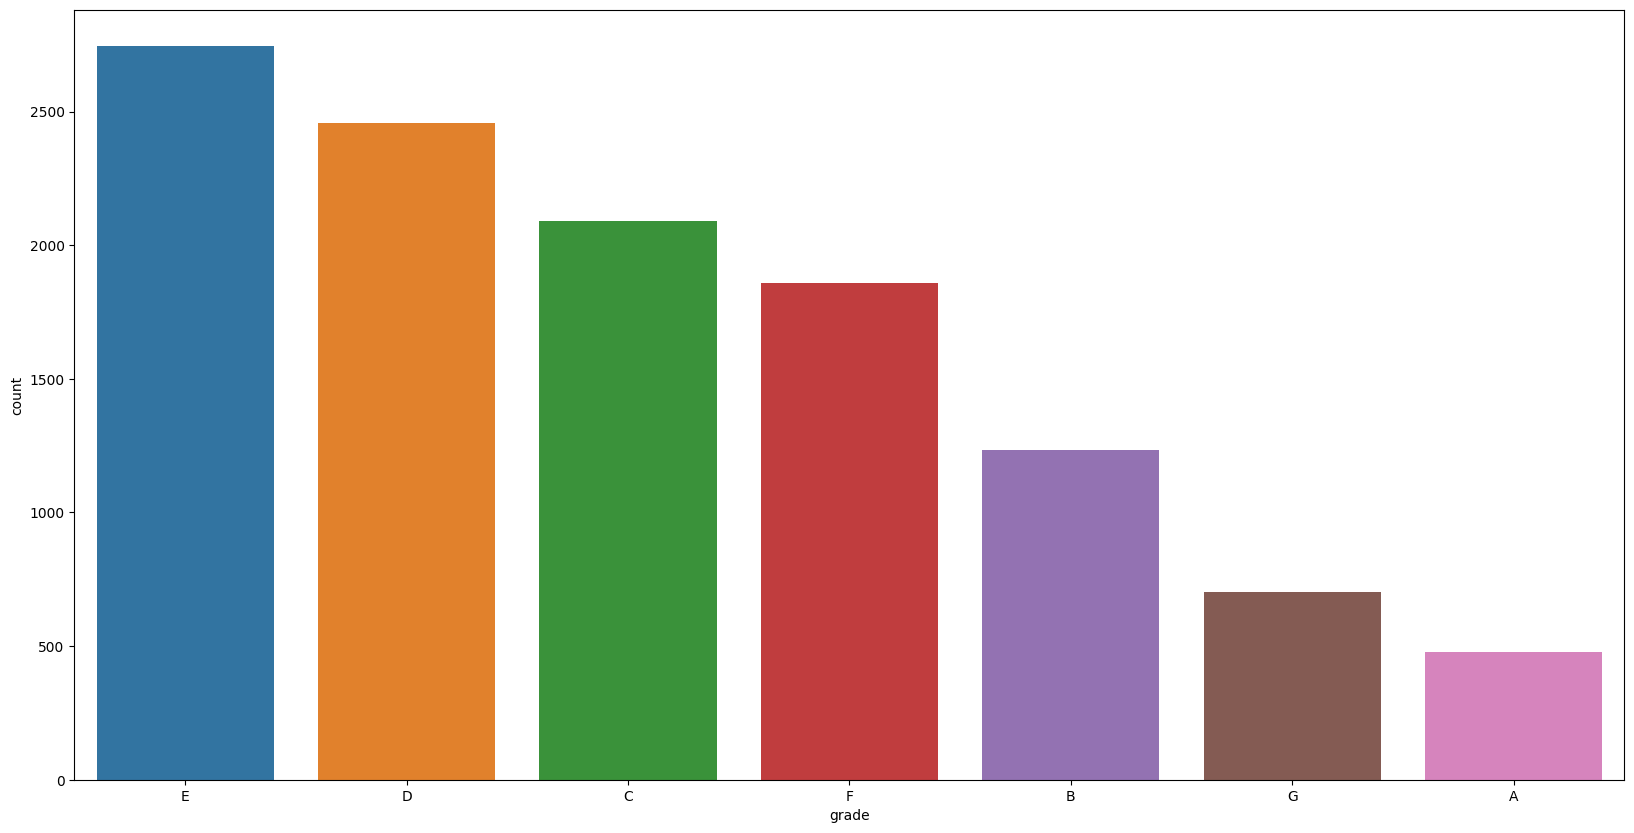

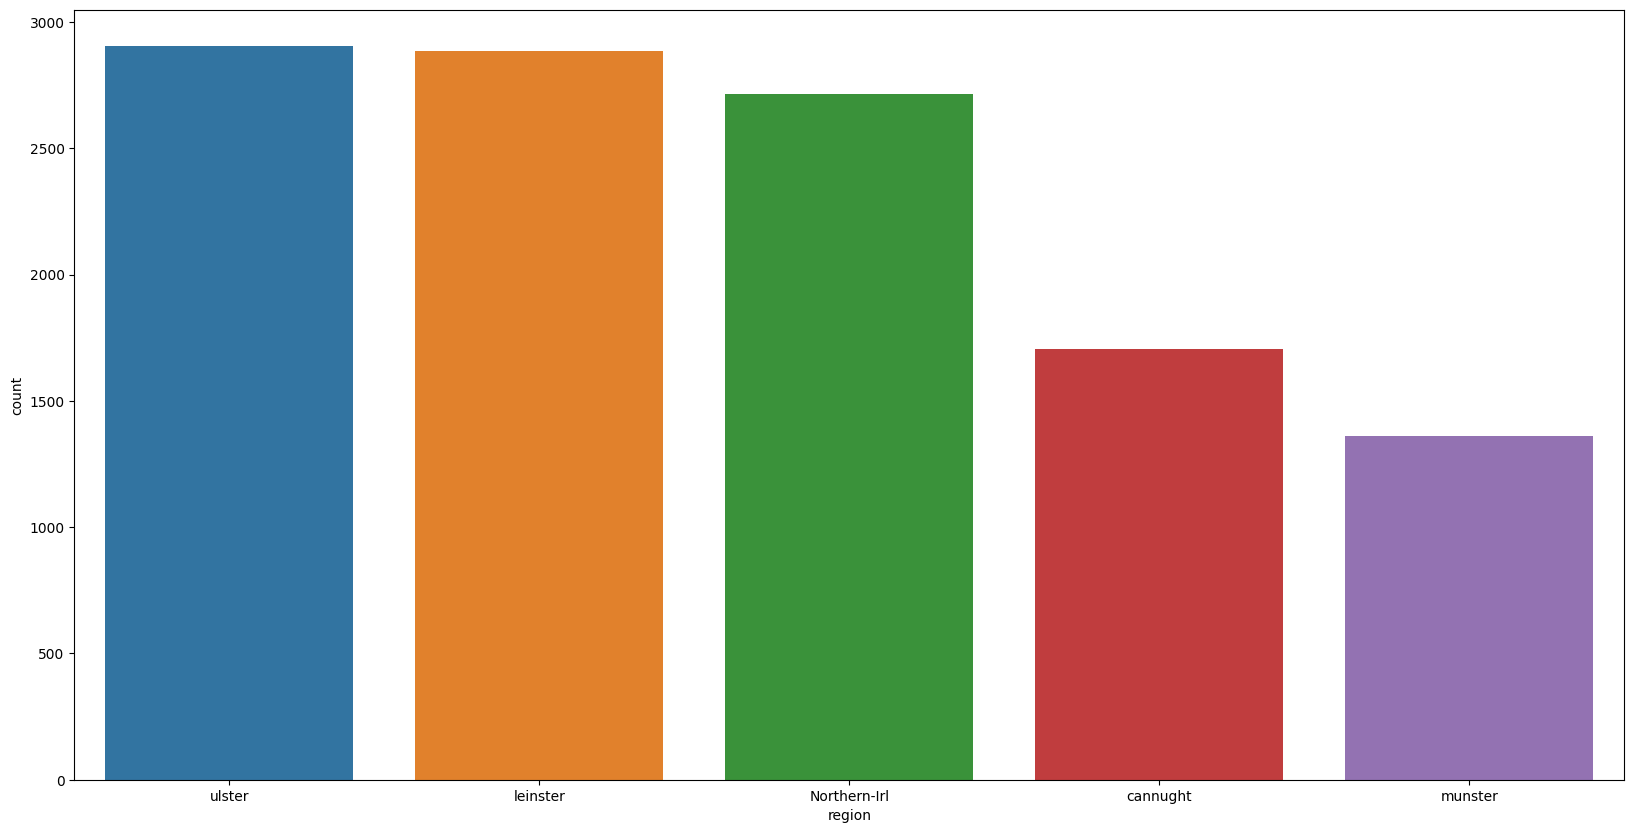

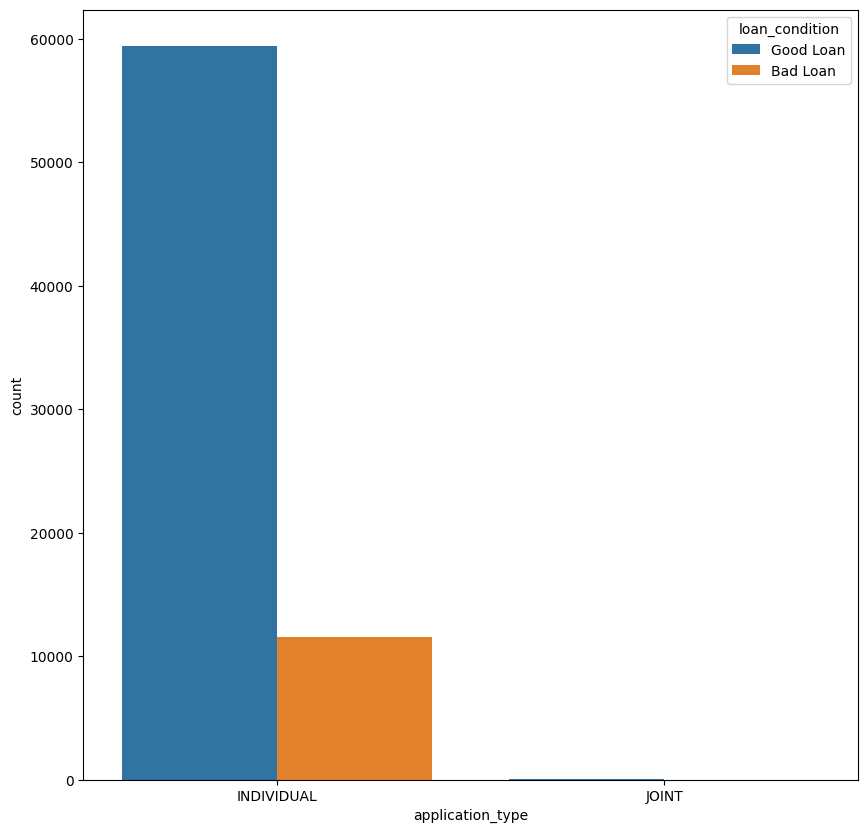

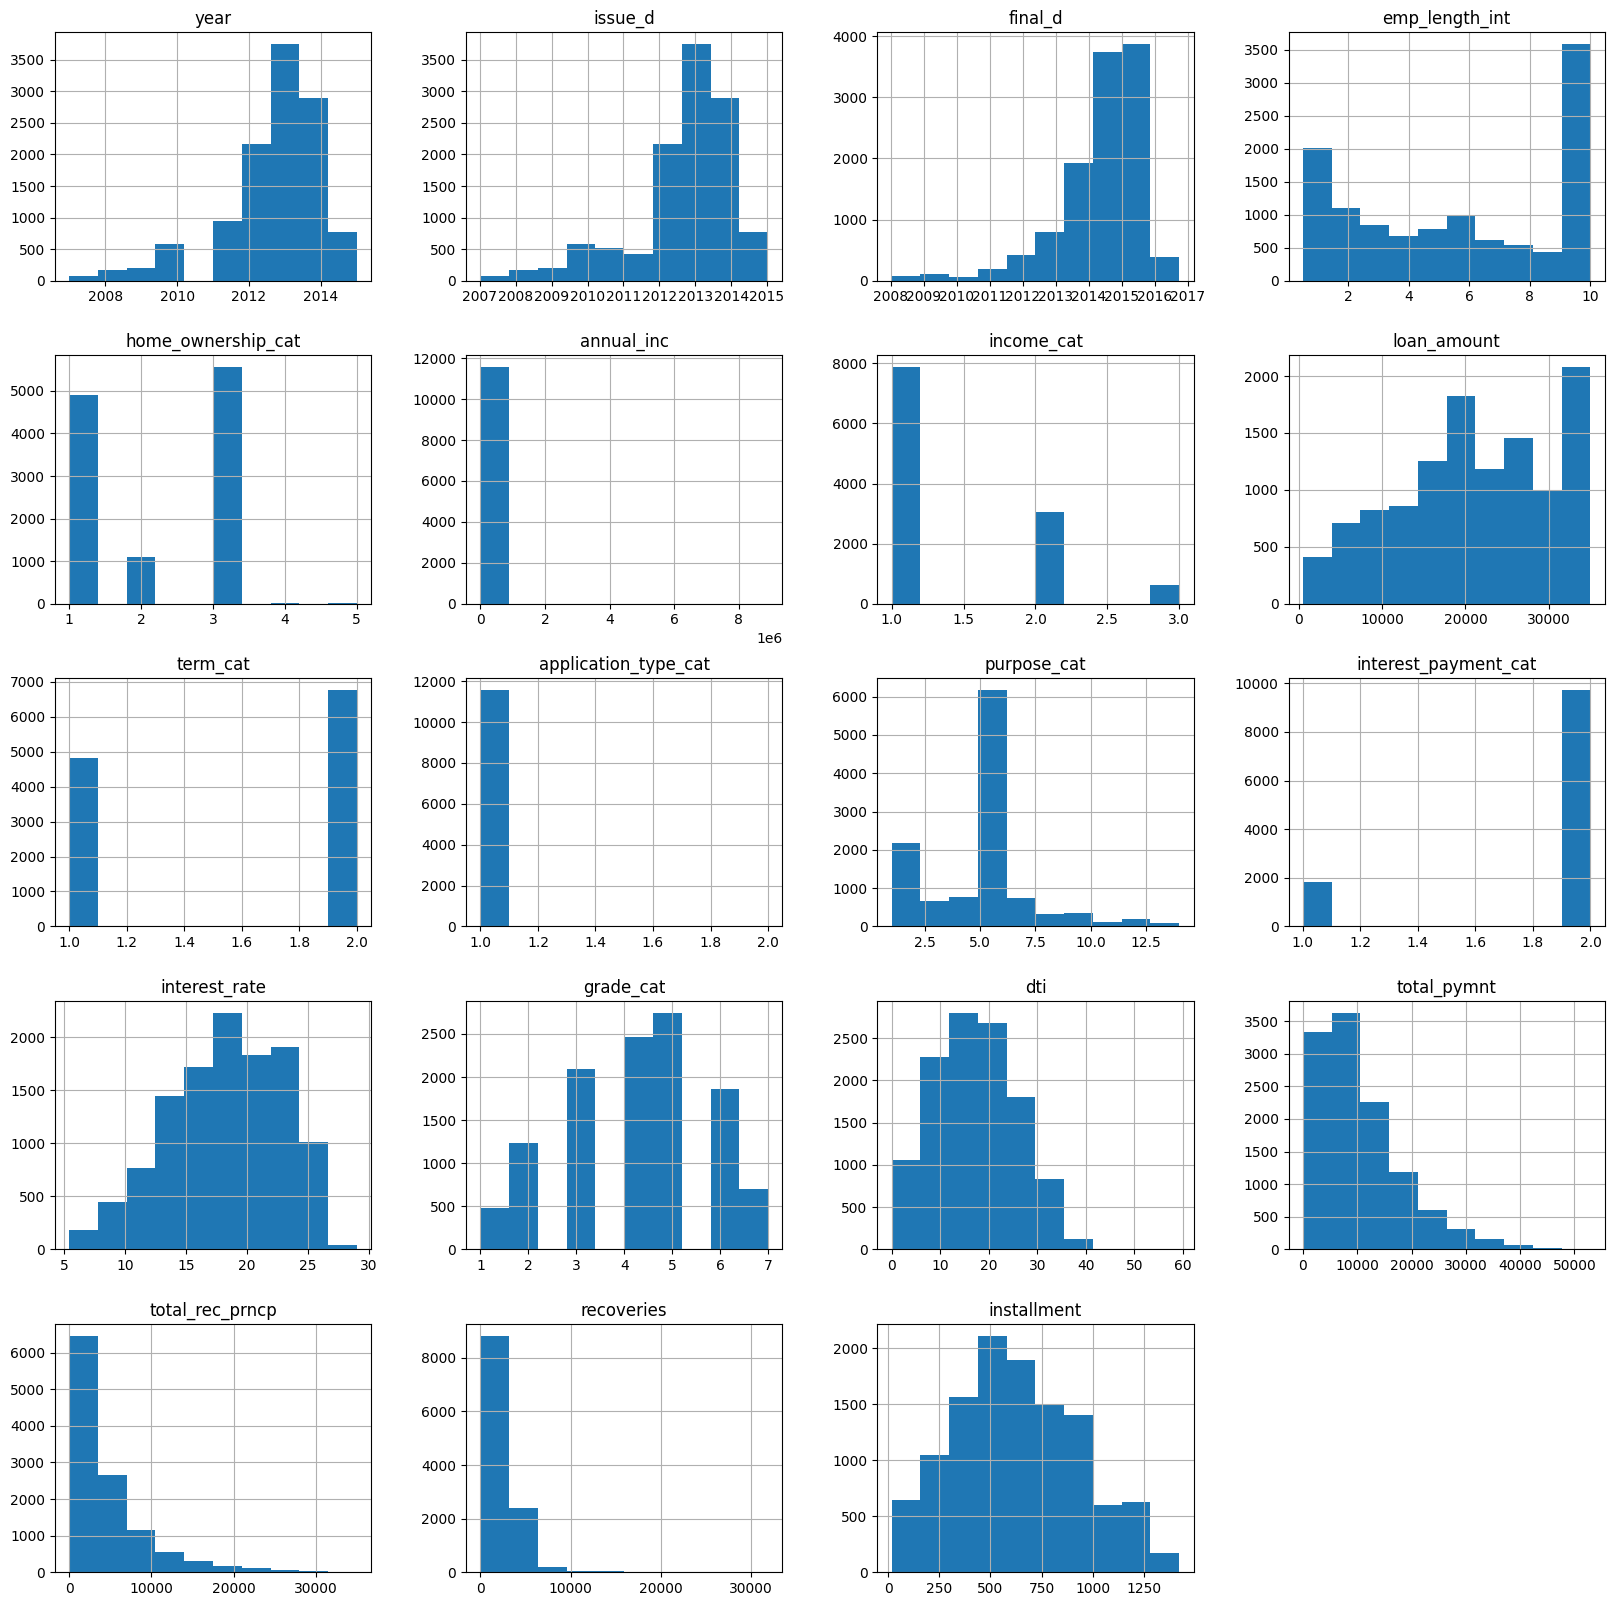

<Figure size 2000x2000 with 0 Axes>

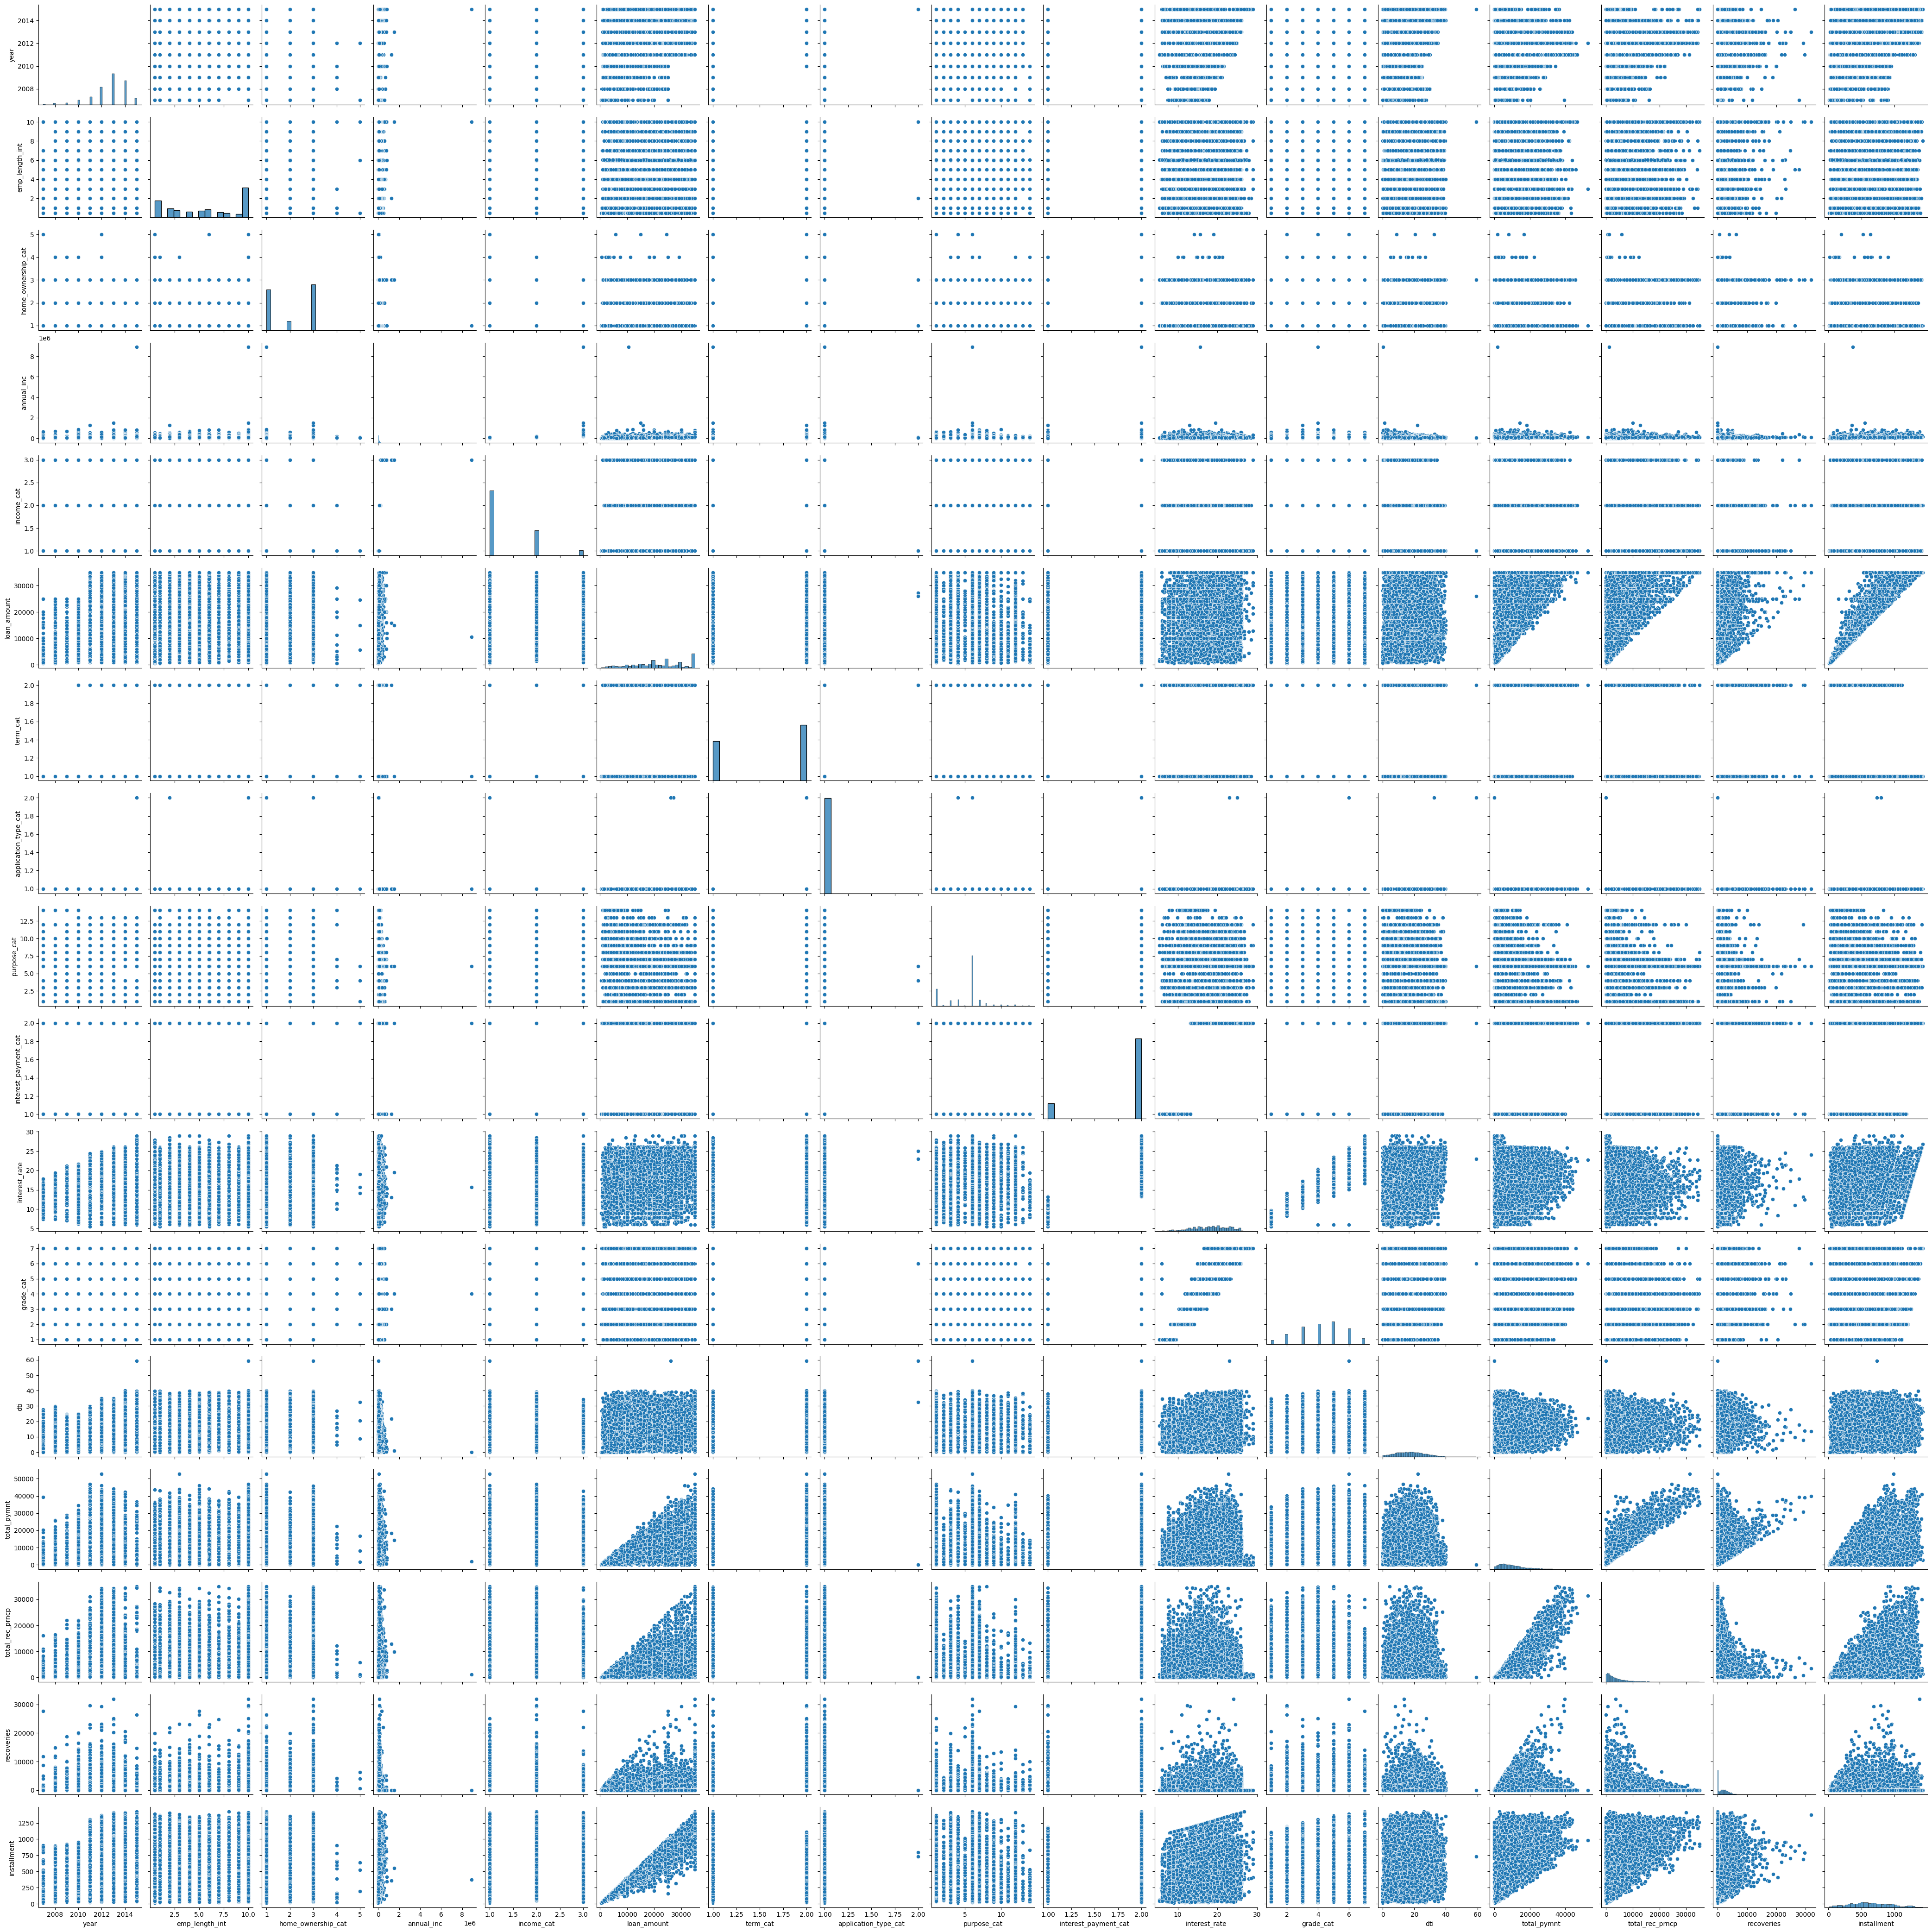

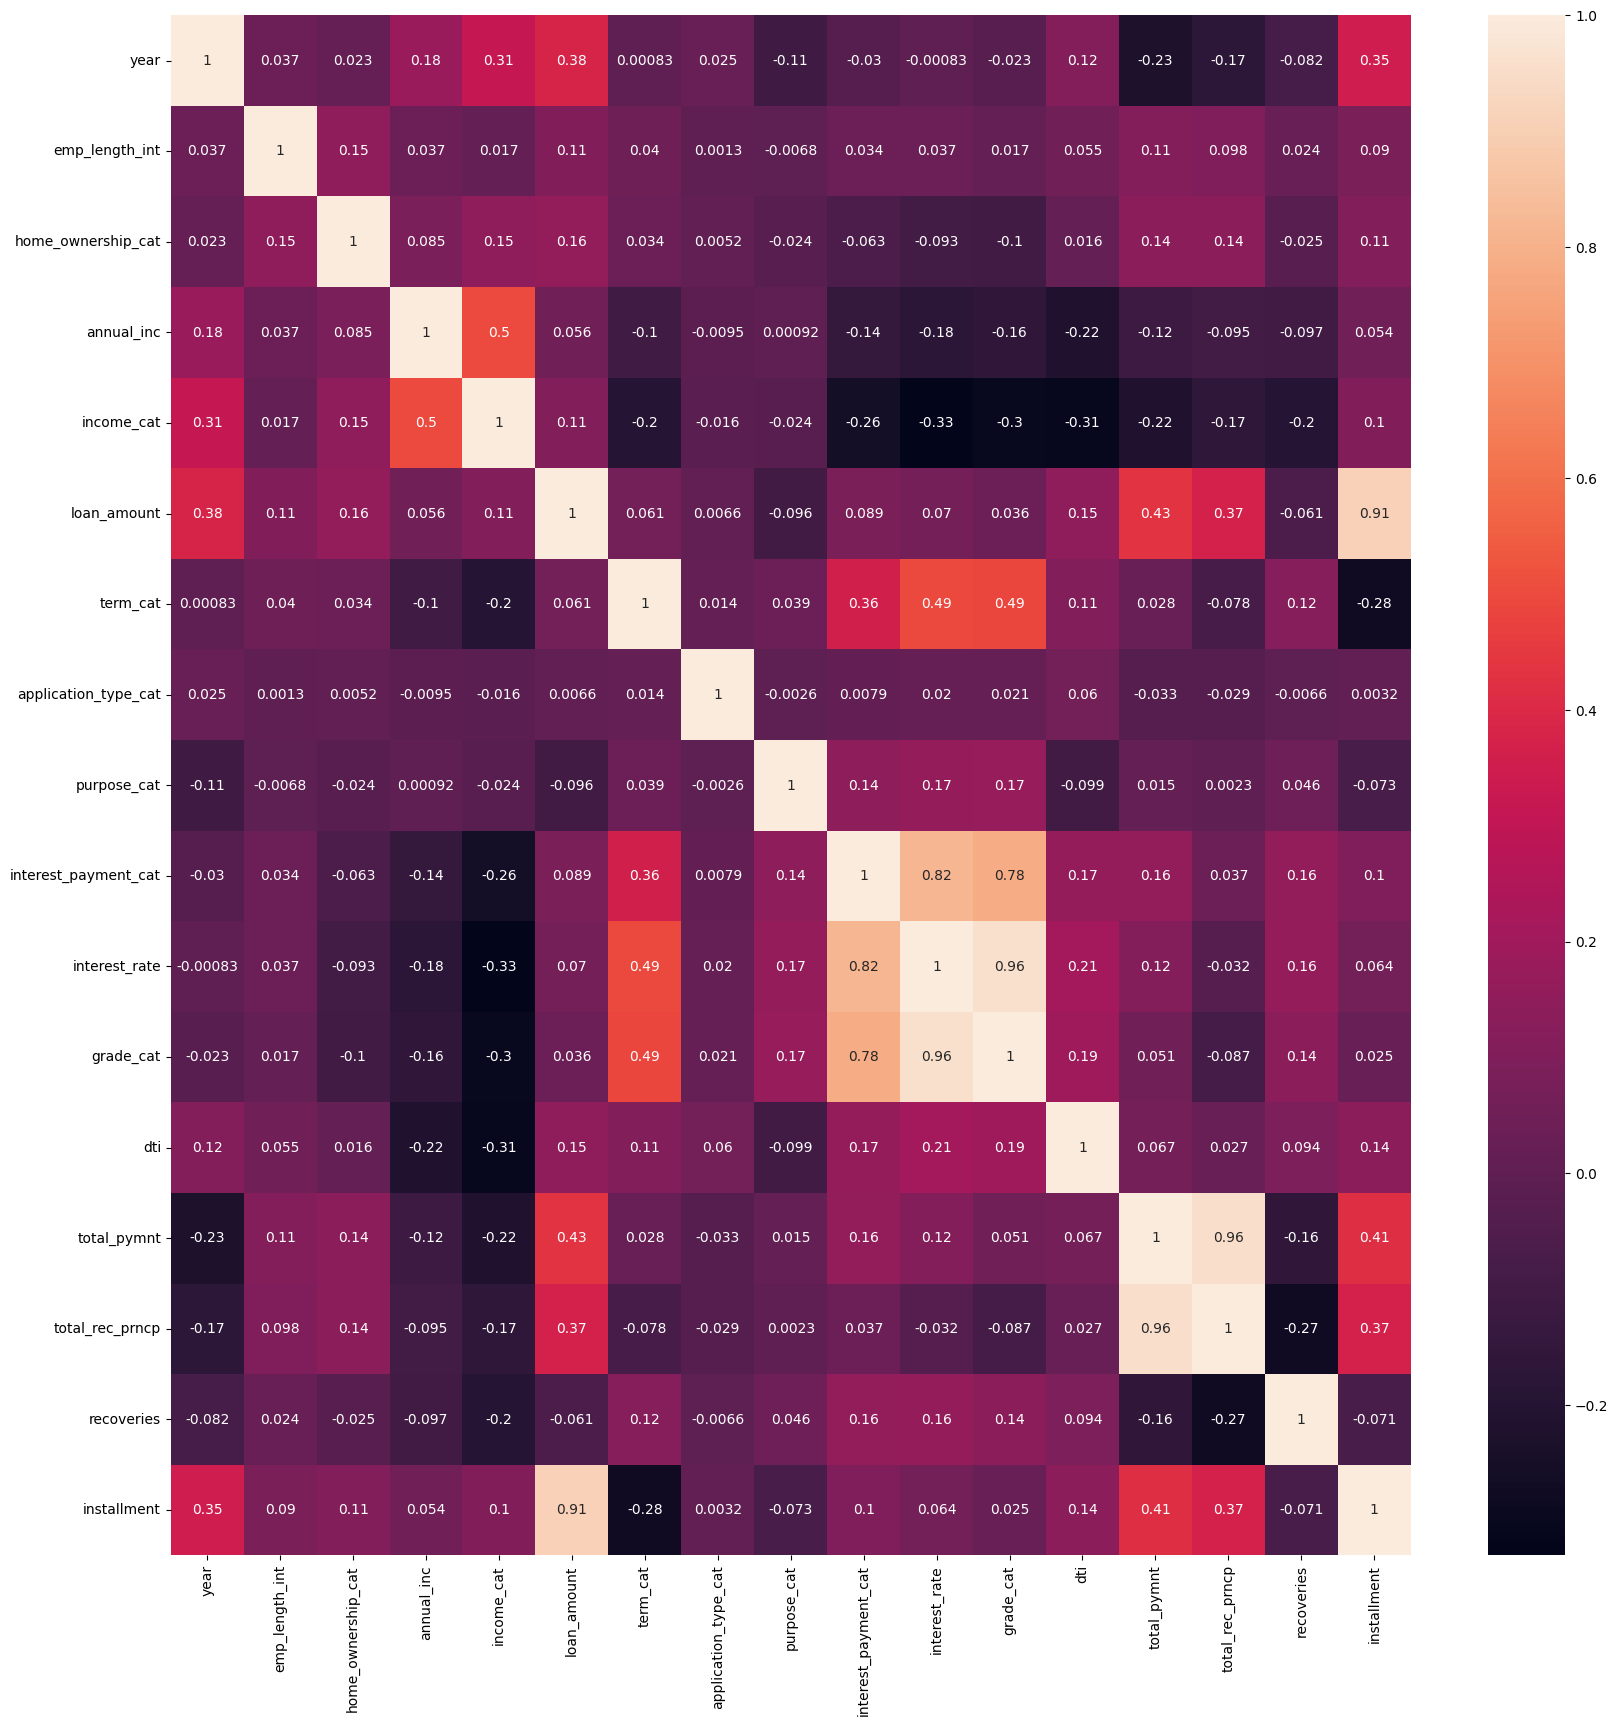

In [6]:
eda(X_train, y_train, X_test, y_test)

In [7]:

#import under sampling
from imblearn.under_sampling import RandomUnderSampler
#import label encoder
from sklearn.preprocessing import LabelEncoder
def featuring(X_train, X_test,y_train,y_test):

    #label encoding region
    le=LabelEncoder()
    X_train['region']=le.fit_transform(X_train['region'])
    X_test['region']=le.transform(X_test['region'])
    
    #take all numerical variables from X_train and X_test
    X_train_num=X_train.select_dtypes(include=['int64','float64'])
    X_test_num=X_test.select_dtypes(include=['int64','float64'])

    #drop year, income_category, installment, total_rec_prncp
    X_train_num.drop(['year','income_cat','installment','total_rec_prncp'],axis=1,inplace=True)
    X_test_num.drop(['year','income_cat','installment','total_rec_prncp'],axis=1,inplace=True)

   #under sampling
    rus=RandomUnderSampler(random_state=42)
    X_train_rus,y_train_rus=rus.fit_resample(X_train_num,y_train)


    #print columns of X_train_num and X_test_num
    print('X_train_num columns: ',X_train_num.columns)
    print('X_test_num columns: ',X_test_num.columns)

    #print shape of X_train_sm and y_train_sm
    print('X_train_sm shape: ',X_train_rus.shape)
    print('y_train_sm shape: ',y_train_rus.shape)


    return X_train_rus, X_test_num, y_train_rus, y_test

    

In [8]:
X_train_rus, X_test_num, y_train_rus, y_test=featuring(X_train, X_test, y_train, y_test)

X_train_num columns:  Index(['emp_length_int', 'home_ownership_cat', 'annual_inc', 'loan_amount',
       'term_cat', 'application_type_cat', 'purpose_cat',
       'interest_payment_cat', 'interest_rate', 'grade_cat', 'dti',
       'total_pymnt', 'recoveries', 'region'],
      dtype='object')
X_test_num columns:  Index(['emp_length_int', 'home_ownership_cat', 'annual_inc', 'loan_amount',
       'term_cat', 'application_type_cat', 'purpose_cat',
       'interest_payment_cat', 'interest_rate', 'grade_cat', 'dti',
       'total_pymnt', 'recoveries', 'region'],
      dtype='object')
X_train_sm shape:  (107778, 14)
y_train_sm shape:  (107778,)


In [9]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def basemodel(X_train_rus, X_test_num, y_train_rus, y_test):
    
    #create logistic regression model
    logreg=LogisticRegression()

    #fit X_train_sm and y_train_sm
    logreg.fit(X_train_rus,y_train_rus)

    #predict X_test_num
    y_pred=logreg.predict(X_test_num)

    #print classification report
    print(classification_report(y_test,y_pred))

    #print confusion matrix
    print(confusion_matrix(y_test,y_pred))

    #print accuracy score
    print(accuracy_score(y_test,y_pred))

    
    return logreg


In [10]:
basemodel(X_train_rus, X_test_num, y_train_rus, y_test)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87    163936
           1       0.20      0.61      0.30     13540

    accuracy                           0.78    177476
   macro avg       0.58      0.71      0.59    177476
weighted avg       0.90      0.78      0.83    177476

[[130957  32979]
 [  5220   8320]]
0.7847652640357006


LogisticRegression()

In [11]:
# import random forest classifier, decision tree classifier, xgboost classifier, adaboost classifier, gradient boosting classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

def modeling(X_train_rus, y_train_rus, X_test_num, y_test):
    models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),XGBClassifier()]
    model_names=['Random Forest Classifier','AdaBoost Classifier','Gradient Boosting Classifier','Decision Tree Classifier','XGB Classifier']
    accuracy=[]
    #create for loop for models and model_names and print accuracy score,confusion matrix and classification report for each model
    for model in range(len(models)):
        clf=models[model]
        clf.fit(X_train_rus,y_train_rus)
        y_pred=clf.predict(X_test_num)
        accuracy.append(accuracy_score(y_test,y_pred))
        print(model_names[model])
        print('Accuracy Score: ',accuracy_score(y_test,y_pred))
        print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))
        print('Classification Report: ',classification_report(y_test,y_pred))
        print('\n')
    #create dataframe of accuracy and model_names
    accuracy_df=pd.DataFrame({'Accuracy':accuracy,'Model':model_names})
    #plot bar chart of accuracy_df
    plt.figure(figsize=(10,10))
    sns.barplot(data=accuracy_df,x='Accuracy',y='Model')
    plt.title('Accuracy of Models')
    plt.show()

    return models

Random Forest Classifier
Accuracy Score:  0.8260046428812909
Confusion Matrix:  [[136666  27270]
 [  3610   9930]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.83      0.90    163936
           1       0.27      0.73      0.39     13540

    accuracy                           0.83    177476
   macro avg       0.62      0.78      0.64    177476
weighted avg       0.92      0.83      0.86    177476



AdaBoost Classifier
Accuracy Score:  0.7965189659446911
Confusion Matrix:  [[132179  31757]
 [  4356   9184]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      0.81      0.88    163936
           1       0.22      0.68      0.34     13540

    accuracy                           0.80    177476
   macro avg       0.60      0.74      0.61    177476
weighted avg       0.91      0.80      0.84    177476



Gradient Boosting Classifier
Accuracy Score:  0.8023789132051657
Conf

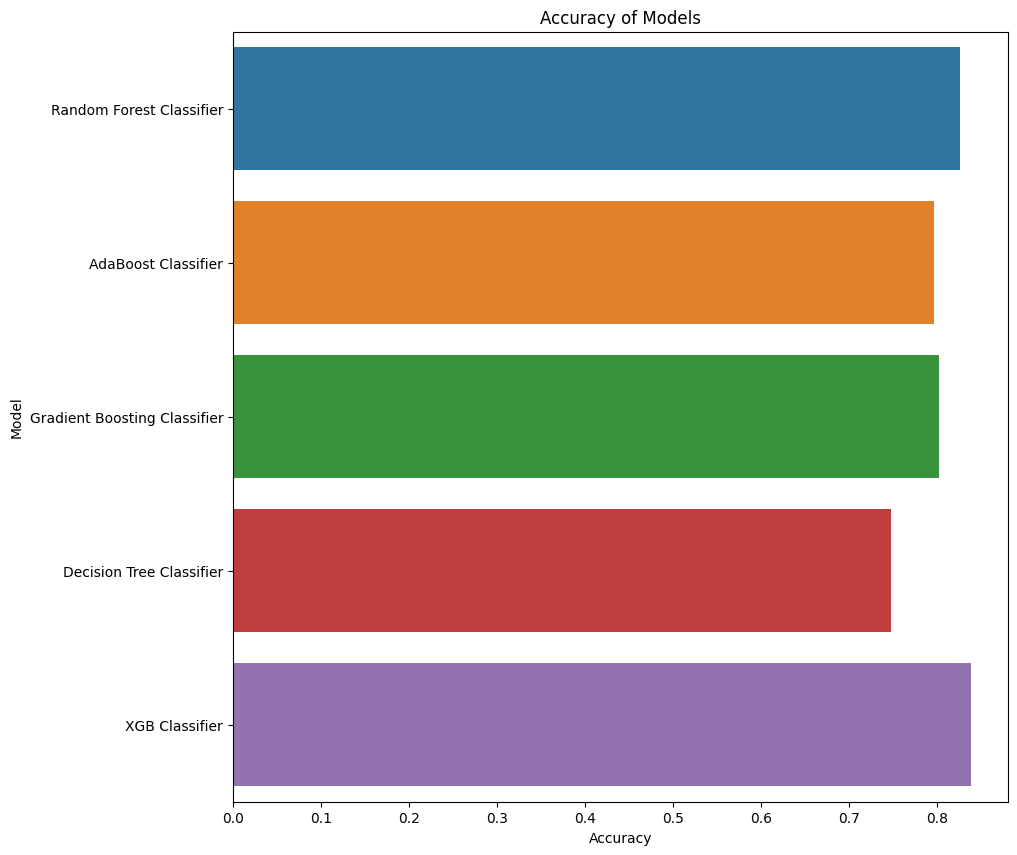

[RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 DecisionTreeClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

In [12]:
modeling(X_train_rus, y_train_rus, X_test_num, y_test)

In [13]:
#train XGBClassifier and perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
def tuning(X_train_rus, y_train_rus, X_test_num, y_test):
      #create a dictionary of parameters
    param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                  'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                  'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                  'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}
    #create a grid search object and fit it to the data
    clf = GridSearchCV(XGBClassifier(), param_grid, scoring='accuracy', n_jobs=-1, cv=5)
    clf.fit(X_train_rus, y_train_rus)
    #print best parameters and best score
    print(clf.best_params_)
    print(clf.best_score_)
    #predict using the best estimator
    y_pred = clf.best_estimator_.predict(X_test_num)
    #print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    return clf.best_estimator_


In [14]:
tuning(X_train_rus, y_train_rus, X_test_num, y_test)

KeyboardInterrupt: 